In [17]:
%reload_ext autoreload
%autoreload

import numpy as np
import creature_spawning.spawn_creature as sc
import visualization.plant_rendering as pr
import visualization.array_rendering as ar
import simulation.gas_drift as gd
import simulation.plant_simulation as ps

world_params = { 'world_size': 100,
             'global_creature_id_counter': int(1) }
world_params['world_array'] = np.zeros(shape=(world_params['world_size'], world_params['world_size']), dtype=int)
world_params['carbon_dioxide_map'] = np.full(shape=(world_params['world_size'], world_params['world_size']),
                         fill_value=0)
world_params['carbon_dioxide_map'][0][0] = 0
sc.spawn_new_plants(world_params=world_params,
                         num_plants=10)
pr.place_plants(world_params)

def run_sim_for_50_steps():

    for i in range(1000):
        pr.place_plants(world_params)
        ps.photosynthesize(world_params)
        world_params['carbon_dioxide_map'][int(world_params['world_size'] / 2)][int(world_params['world_size'] / 2)] += 1
        gd.move_gases(world_params)
        ps.grow_plants(world_params)




In [18]:
%reload_ext line_profiler

%lprun -f run_sim_for_50_steps run_sim_for_50_steps()

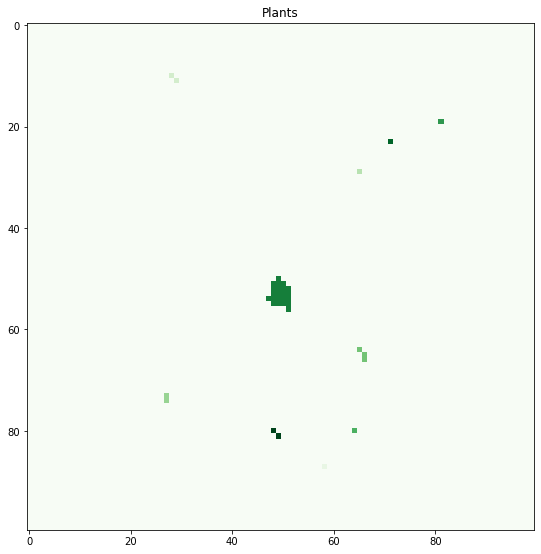

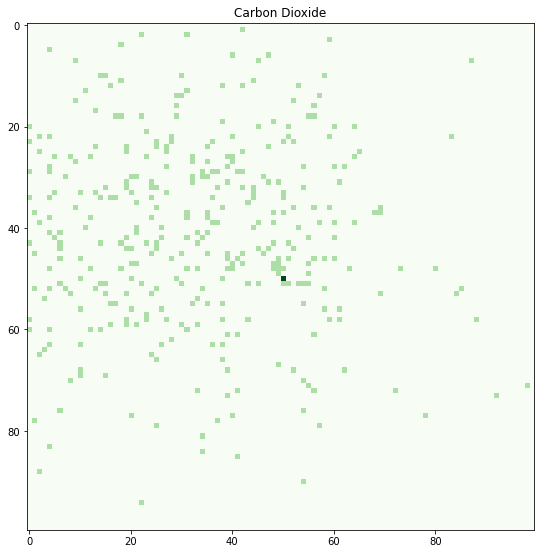

In [19]:
ar.render_array(world_params['world_array'], 'Plants')
ar.render_array(world_params['carbon_dioxide_map'], 'Carbon Dioxide')